<a href="https://colab.research.google.com/github/PMcTwist/Machine-Learning-Course/blob/main/Week2Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries

In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specific imports
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Load the dataset

In [5]:
dataset = pd.read_csv('Position_Salaries.csv')

# Verify data import
print(dataset.info())
print(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None
            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


Break data in to X and y sets

In [7]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Fir to Ploynomial Regression

In [10]:
# Setup X to be a polynomial regression graph
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

# Instantiate a regular regression fit with the poly data and normal y data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

Find the fit for 6.5 position and it's pay

In [12]:
new_lvl = 6.5
new_lvl_poly = poly_reg.transform(np.array([[new_lvl]]))
pred_sal = lin_reg.predict(new_lvl_poly)

Make a pretty graph

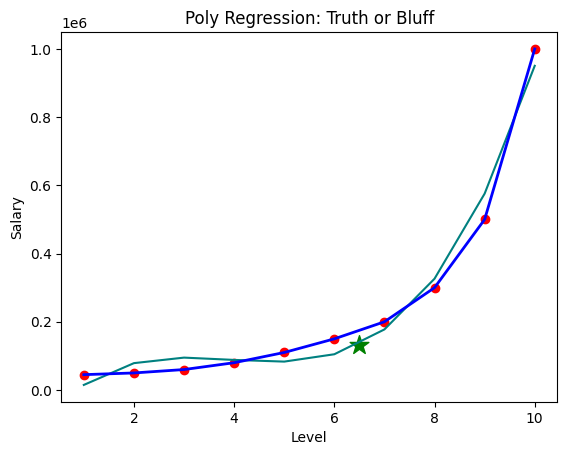

In [16]:
# Setup data lines and dots
plt.scatter(X, y, color='red', label='Raw Data')
plt.scatter(new_lvl, pred_sal, color='green', marker='*', s=200, label=f'Predicted Salary: {pred_sal[0]:.2f}')
plt.plot(X, lin_reg.predict(poly_reg.transform(X)), color='teal', label='Polynomial Regression')

# Overlay the line of regression
plt.plot(X, y, color='blue', linewidth=2, label='Regression')

# Setup Labels for graph
plt.title('Poly Regression: Truth or Bluff')
plt.xlabel('Level')
plt.ylabel('Salary')

# Render Graph
plt.show()